# Introduction

The data set we chose is Firefighter Fatalities in the United States from Kaggle (https://www.kaggle.com/fema/firefighter-fatalities). This data comes from the U.S. Fire Administration which tracks and collects information on the causes of on-duty firefighter fatalities. Data are reported by individual fire departments, chief fire officers, fire service organizations, the National Fire Protection Association, and the National Fallen Firefighters Foundation. The data set include information on the name, age, rank, date and cause of death, and nine other variables for all firefighters killed between 2000 and 2015.

## Research Questions

- What is the age distribution of dead firefighters?
- What are the most common causes of death?
- Do career firefighters die at a later age than volunteers, in average?
- Is the cause of death correlated with age?
- Do most deaths occur at on-scene fires?
- What is the breakdown of rank and how does that relate to age of death?
- Is gender a factor in age of death?
- What is the historical trend in average age of death?

# Firefighter Fatalities

In [12]:
firefighters <- read.csv("database.csv", na.strings = c(""," ","NA")) # read and set as NA the empty or space-containing cells

#Structure of the data
str(firefighters) # which is a data frame of 2005 observations and 14 character variables

#First row
head(firefighters, 1)

#Last row
tail(firefighters, 1) 

'data.frame':	2005 obs. of  14 variables:
 $ First.Name      : Factor w/ 500 levels "Adam","Alan",..: 407 304 416 9 177 272 152 227 45 489 ...
 $ Last.Name       : Factor w/ 1672 levels "Abriel","Ackerman",..: 1175 1191 1099 1421 58 345 1657 15 184 515 ...
 $ Age             : Factor w/ 75 levels "14","15","16",..: 51 44 23 45 24 40 39 34 10 61 ...
 $ Rank            : Factor w/ 259 levels "29","2nd Assistant Chief",..: 120 228 179 120 120 28 178 87 120 28 ...
 $ Classification  : Factor w/ 9 levels "Career","Firefighter/EMT",..: 6 6 6 6 6 1 6 6 6 6 ...
 $ Date.of.Incident: Factor w/ 1325 levels "Apr 1, 2002",..: 332 580 477 477 489 497 492 497 1192 543 ...
 $ Date.of.Death   : Factor w/ 1339 levels "Apr 1, 2002",..: 469 578 474 474 491 501 501 501 525 548 ...
 $ Cause.Of.Death  : Factor w/ 14 levels "Assault","Collapse",..: 11 11 11 11 12 11 7 8 8 6 ...
 $ Nature.Of.Death : Factor w/ 12 levels "Burns","Drowning",..: 8 4 4 4 9 4 10 10 10 9 ...
 $ Duty            : Factor w/ 7 levels "N

First.Name,Last.Name,Age,Rank,Classification,Date.of.Incident,Date.of.Death,Cause.Of.Death,Nature.Of.Death,Duty,Activity,Emergency,Property.Type,X
Robert,Pollard,64,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Stroke,Response,Vehicle Passenger,Yes,Outdoor Property,NA


,First.Name,Last.Name,Age,Rank,Classification,Date.of.Incident,Date.of.Death,Cause.Of.Death,Nature.Of.Death,Duty,Activity,Emergency,Property.Type,X
2005,Patrick,Wolterman,28,Firefighter,Career,"Dec 28, 2015","Dec 28, 2015",Collapse,Suffocation,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential,NA


## Data Description

The data contains information about the firefighter's names, age, rank, classification, the date of their fatal incident, the date of their death, the cause of their death, the nature of their death, whether or not they were on duty, on scene , what type of activity they were doing, if they were handling an emergency, and the property type for the incident.

Potential improvements to the dataset include adding information on gender, location of incident, time in the force. Gender information is added later to the data.

# Data Clean Up and Preparation

In [13]:
library("tidyverse")

## Abnormal Entry

We noticed an abnormal observation entry. As shown below, it was row 762, which had empty col 2, Last.Name in col 3, and all subsequent columns shifted to the right. This created an additional column X, that was empty for all rows except for row 762.

In [14]:
firefighters[which(is.na(firefighters$Last.Name)),]      ## which row has Last.Name: "NA";  show the row
# remove row 762 and column "X"
firefighters <- firefighters[-762, c(1:13)]
str(firefighters) # leaving 2004 records and 13 variables

,First.Name,Last.Name,Age,Rank,Classification,Date.of.Incident,Date.of.Death,Cause.Of.Death,Nature.Of.Death,Duty,Activity,Emergency,Property.Type,X
762,Nadar,NA,Hammett,29,Firefighter/EMT,Career,"Dec 1, 2003","Dec 1, 2003",Impact,No,Trauma,Personal Vehicle Driver/Passenger,Training,Street/Road


'data.frame':	2004 obs. of  13 variables:
 $ First.Name      : Factor w/ 500 levels "Adam","Alan",..: 407 304 416 9 177 272 152 227 45 489 ...
 $ Last.Name       : Factor w/ 1672 levels "Abriel","Ackerman",..: 1175 1191 1099 1421 58 345 1657 15 184 515 ...
 $ Age             : Factor w/ 75 levels "14","15","16",..: 51 44 23 45 24 40 39 34 10 61 ...
 $ Rank            : Factor w/ 259 levels "29","2nd Assistant Chief",..: 120 228 179 120 120 28 178 87 120 28 ...
 $ Classification  : Factor w/ 9 levels "Career","Firefighter/EMT",..: 6 6 6 6 6 1 6 6 6 6 ...
 $ Date.of.Incident: Factor w/ 1325 levels "Apr 1, 2002",..: 332 580 477 477 489 497 492 497 1192 543 ...
 $ Date.of.Death   : Factor w/ 1339 levels "Apr 1, 2002",..: 469 578 474 474 491 501 501 501 525 548 ...
 $ Cause.Of.Death  : Factor w/ 14 levels "Assault","Collapse",..: 11 11 11 11 12 11 7 8 8 6 ...
 $ Nature.Of.Death : Factor w/ 12 levels "Burns","Drowning",..: 8 4 4 4 9 4 10 10 10 9 ...
 $ Duty            : Factor w/ 7 levels "N

Now we can format the columns and remove extraneous information that we won't use in the analysis like Last.Name. We'll also get rid of rank which has too many levels without a good method of comparing them.

In order to use the Date of Incident and Date of Death columns as dates in R, we are converting them from strings using the as.Date() function. This will allow us to look at the different between the columns and calculate the number of days after an incident that death occurs.

In [15]:
firefighters2 <- select(firefighters, -c(2, 4))

firefighters2$Age <- sapply(firefighters2$Age, as.integer)
firefighters2$Date.of.Death <- as.Date(firefighters$Date.of.Death, "%b %d, %Y")
firefighters2$Date.of.Incident <- as.Date(firefighters$Date.of.Incident, "%b %d, %Y")

l1 <- c("Classification", "Cause.Of.Death", "Nature.Of.Death", "Duty", "Activity", "Property.Type", "Emergency")
firefighters2[, l1] <- lapply(firefighters2[, l1], factor)

str(firefighters2)

'data.frame':	2004 obs. of  11 variables:
 $ First.Name      : Factor w/ 500 levels "Adam","Alan",..: 407 304 416 9 177 272 152 227 45 489 ...
 $ Age             : int  51 44 23 45 24 40 39 34 10 61 ...
 $ Classification  : Factor w/ 8 levels "Career","Industrial",..: 5 5 5 5 5 1 5 5 5 5 ...
 $ Date.of.Incident: Date, format: "1999-12-31" "2000-01-08" ...
 $ Date.of.Death   : Date, format: "2000-01-01" "2000-01-08" ...
 $ Cause.Of.Death  : Factor w/ 13 levels "Assault","Collapse",..: 10 10 10 10 11 10 6 7 7 5 ...
 $ Nature.Of.Death : Factor w/ 11 levels "Burns","Drowning",..: 7 4 4 4 8 4 9 9 9 8 ...
 $ Duty            : Factor w/ 6 levels "On-Duty","On-Scene Emergency",..: 4 3 4 3 6 1 1 4 4 3 ...
 $ Activity        : Factor w/ 22 levels "Advance Hose Lines/Fire Attack",..: 20 1 1 1 9 17 6 19 19 1 ...
 $ Emergency       : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 1 1 2 2 2 ...
 $ Property.Type   : Factor w/ 12 levels "Educational",..: 6 8 11 6 5 10 5 11 11 8 ...


## Add New Column

In [16]:
firefighters2 <- mutate(firefighters2, Days.After.Incident = Date.of.Death - Date.of.Incident) 
str(firefighters2$Days.After.Incident)

 'difftime' num [1:2004] 1 0 0 0 ...
 - attr(*, "units")= chr "days"


# Data Analysis

## New Subsets

In order to remove bias from the analysis introduced by prominent events on specific dates, we decided to separate the September 11, 2001, firefighters from the rest. We also decided to separate firefighters who handle the Wildlands, who are exposed to different risk factors compared to city firefighters. 

[1] 343  12

[1] 121  12

[1] 1537   12

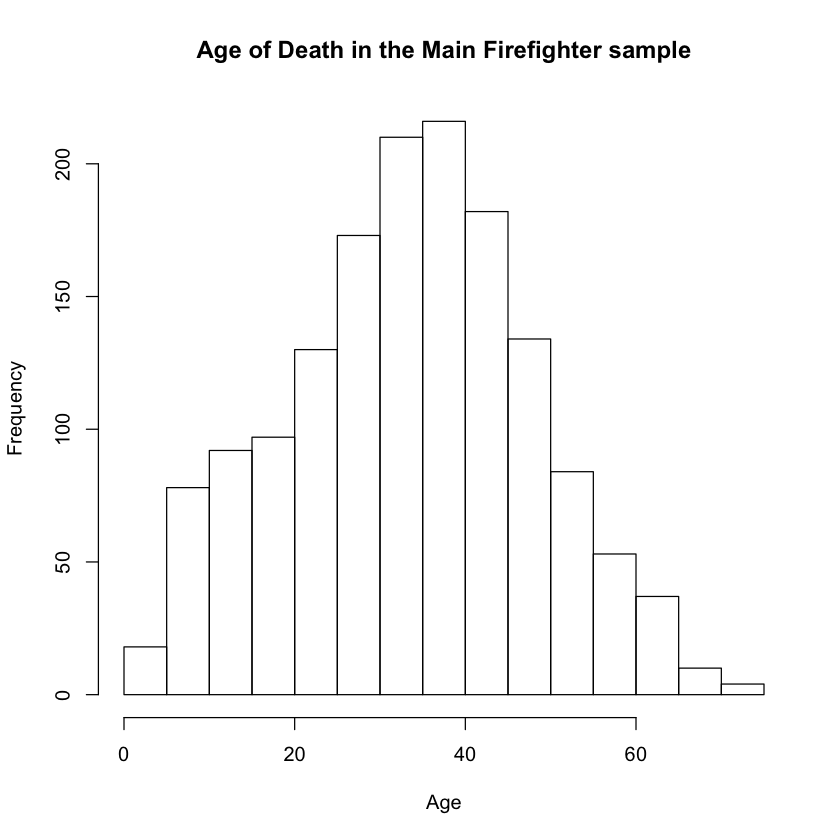

In [17]:
fire_11 <- filter(firefighters2, Date.of.Death == "2001-09-11") 
fire_wild <- filter(firefighters2, str_detect(Classification, "^Wildland"))
fire_main <- filter(firefighters2, Date.of.Death != "2001-09-11" & !str_detect(Classification, "^Wildland"))
dim(fire_11)
dim(fire_wild)
dim(fire_main)  # show the number of rows and columns in each subset

hist(as.integer(fire_main$Age), main="Age of Death in the Main Firefighter sample", xlab="Age")       # show the distribution of age of death across the main firefighter population

## Is Classification a risk factor for early age fatalities?

Remove NA rows in classification columns and age columns. The question is about career people vs volunteers.

Classification,mean_age,sd_age,total
Career,30.79770,10.69220,608
Volunteer,36.29514,15.92486,864


Warning message:
“Removed 19 rows containing non-finite values (stat_boxplot).”

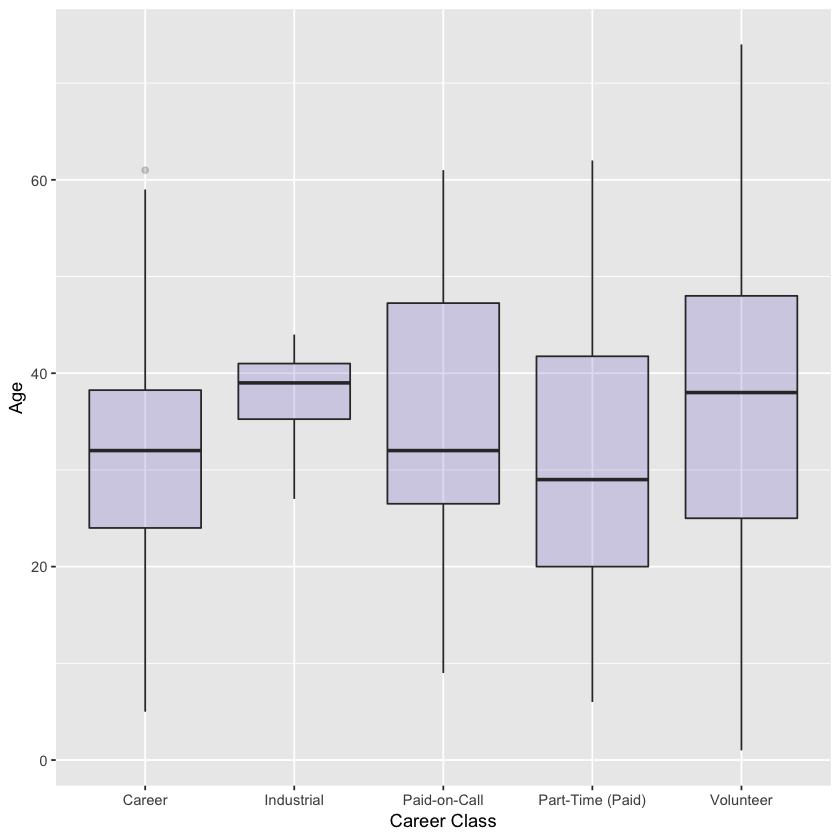

In [18]:
age_class <- select(fire_main, Age, Classification) %>% na.exclude %>% filter(Classification == "Career" | Classification == "Volunteer") %>% arrange(Classification)

group_by(age_class, Classification) %>% summarize(mean_age = mean(as.numeric(Age), na.rm = TRUE), sd_age = sd(as.numeric(Age), na.rm = TRUE), total = n())

ggplot(fire_main, aes(x=Classification, y=Age)) + geom_boxplot(fill="slateblue", alpha=0.2) + xlab("Career Class")

Observation: career firefighters perish an average of 5.6 years younger than Volunteers. This is likely a consequence of: younger enrollment, higher exposure to risk, but those are not testable hypotheses with this dataset.

## What About the Ages of Wildland Firefighters?

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

[1] 24.74167

[1] 14.02189

Classification,mean_age,sd_age,total
Wildland Contract,32.05000,15.713705,40
Wildland Full-Time,26.13333,11.537685,46
Wildland Part-Time,14.60000,7.833563,35


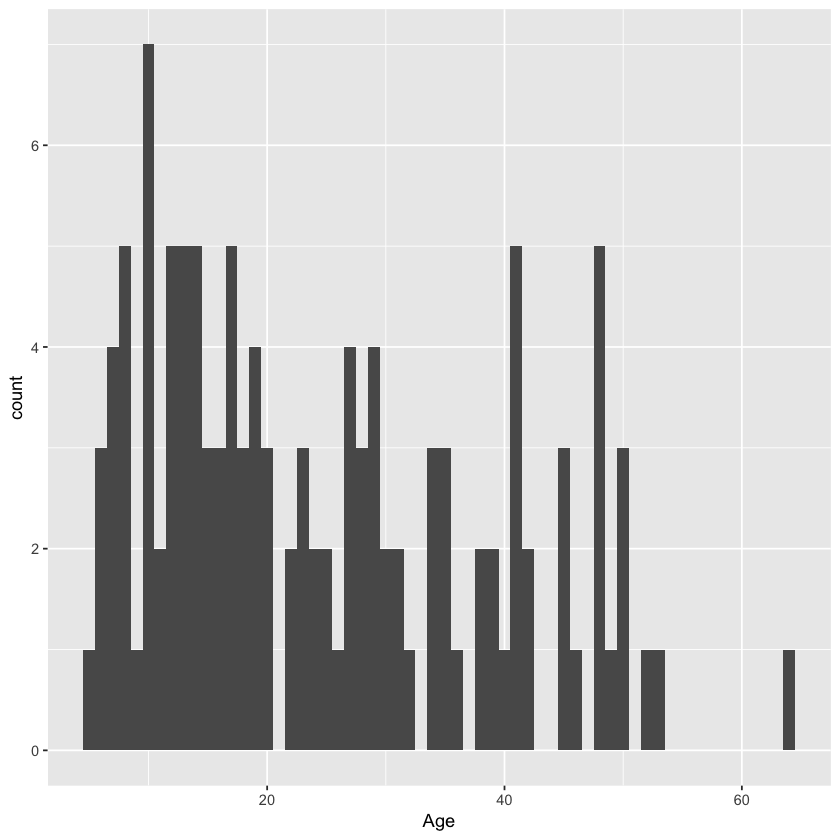

In [19]:
ggplot(fire_wild, aes(x=Age)) + geom_histogram(binwidth = 1)
mean(na.omit(fire_wild$Age))
sd(na.omit(fire_wild$Age))

group_by(fire_wild, Classification) %>% summarize(mean_age = mean(as.numeric(Age), na.rm = TRUE), sd_age = sd(as.numeric(Age), na.rm = TRUE), total = n())

## Is Being On Duty Riskier Factor?

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

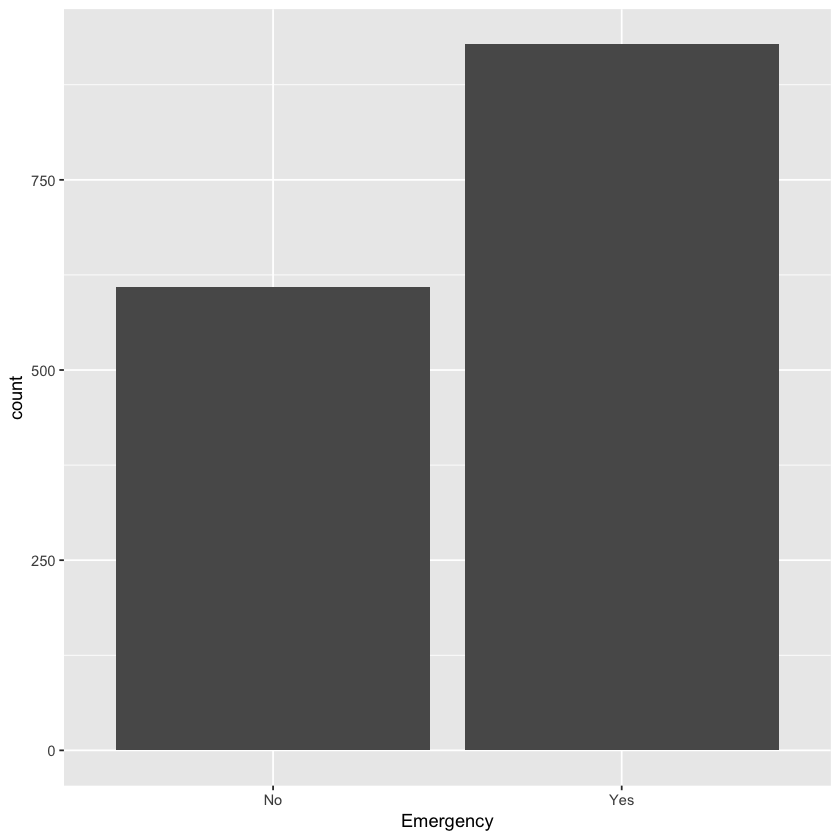

Warning message:
“Factor `Duty` contains implicit NA, consider using `forcats::fct_explicit_na`”

Duty,mean_age,sd_age,total
On-Duty,37.25214,11.96768,476
On-Scene Emergency,38.30370,15.13189,137
On-Scene Fire,31.56144,13.30950,477
Response,31.86328,18.14087,257
Return,37.74194,12.50858,31
Training,30.79221,12.94366,157
NA,29.50000,10.60660,2


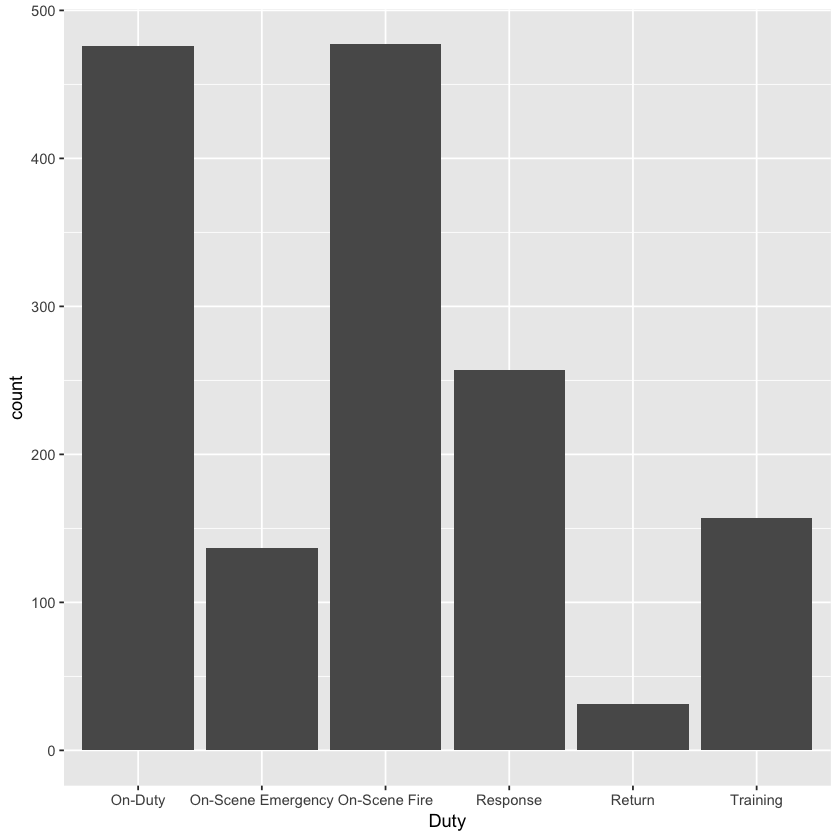

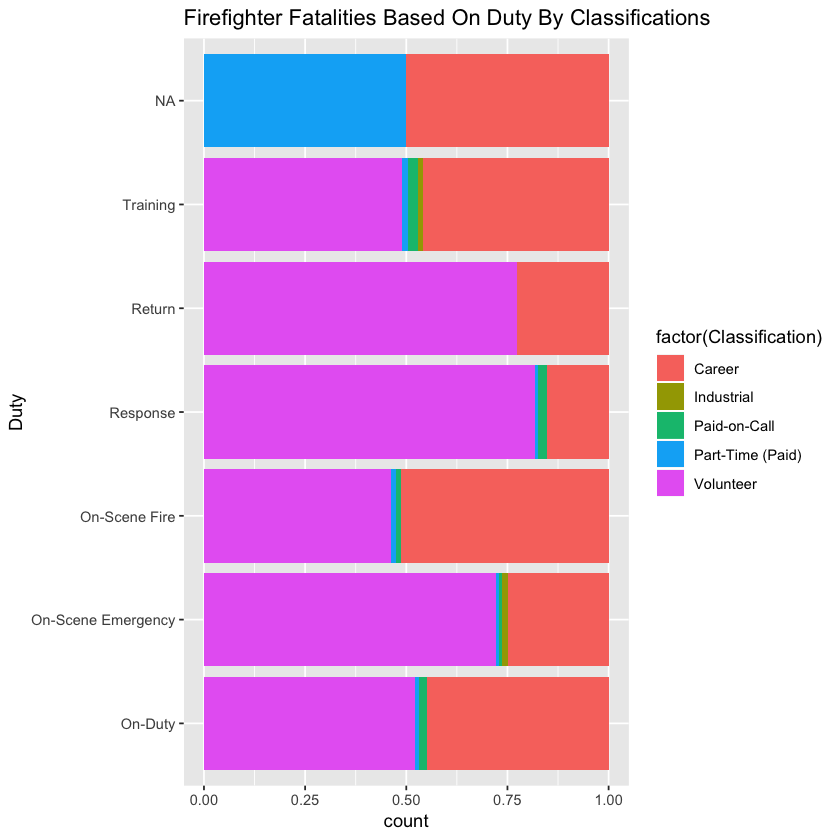

In [20]:
ggplot(fire_main, aes(x=Emergency)) + geom_histogram(stat="count")
fire_main %>% drop_na(Duty) %>% ggplot() + geom_histogram(aes(x=Duty), stat = "count")
group_by(fire_main, Duty) %>% summarize(mean_age = mean(as.numeric(Age), na.rm = TRUE), sd_age = sd(as.numeric(Age), na.rm = TRUE), total = n())

ggplot(fire_main) + aes(x = Duty, fill = factor(Classification)) + geom_bar(position = "fill") + coord_flip() + ggtitle("Firefighter Fatalities Based On Duty By Classifications")

## What Is The Leading Cause of Death?

Warning message:
“Factor `Cause.Of.Death` contains implicit NA, consider using `forcats::fct_explicit_na`”

Cause.Of.Death,mean_age,sd_age,total
Assault,28.75000,14.338177,4
Collapse,25.97727,11.570790,44
Contact,25.50000,3.535534,2
Disorientation,24.23077,12.214430,13
Exposure,34.17391,15.370137,23
Fall,34.40000,16.315062,65
Impact,27.17766,14.559656,202
Other,32.43590,14.208587,41
Smoke,34.25000,10.177590,4
Stress/Overexertion,39.59136,11.611966,820


Warning message:
“Removed 10 rows containing non-finite values (stat_bin).”Warning message in `==.default`(Cause.Of.Death, c("Stress/Overexertion", "Impact", :
“longer object length is not a multiple of shorter object length”Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”

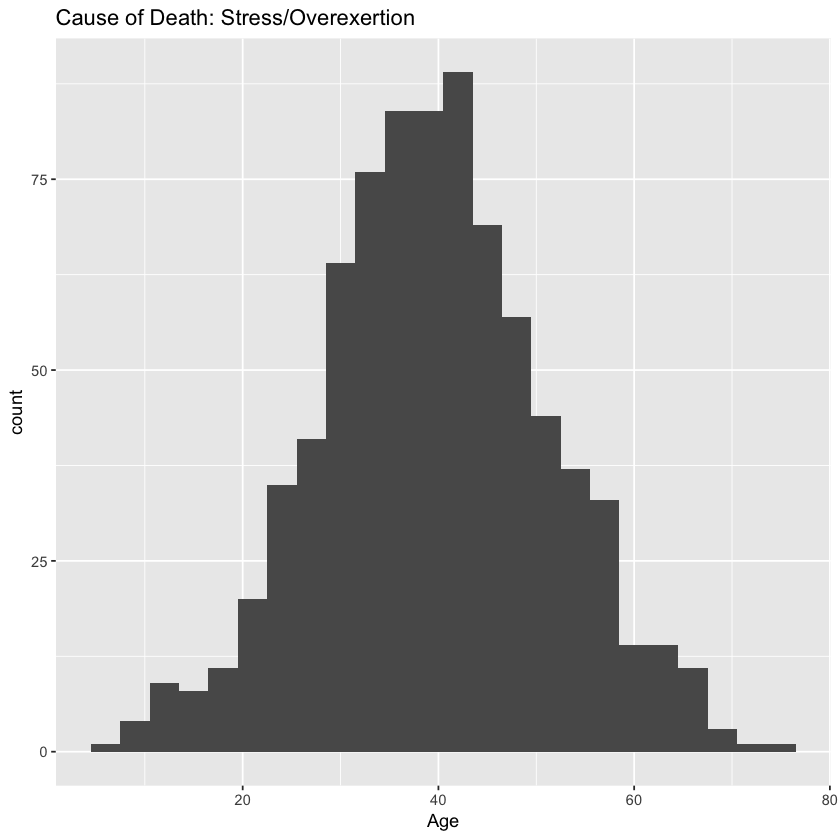

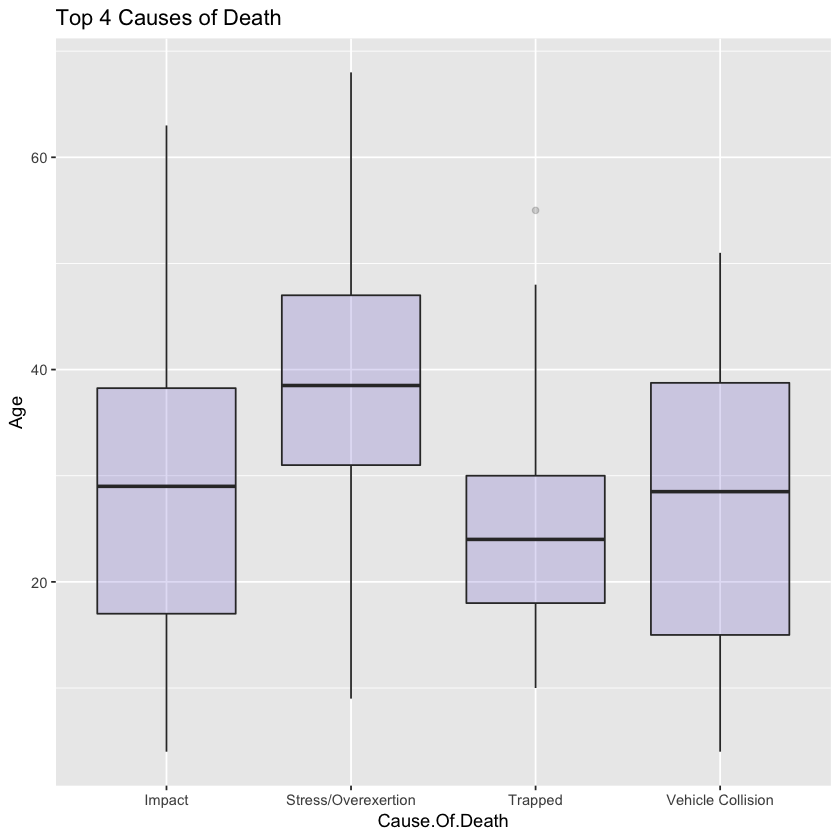

In [21]:
group_by(fire_main, Cause.Of.Death) %>% summarize(mean_age = mean(as.numeric(Age), na.rm = TRUE), sd_age = sd(as.numeric(Age), na.rm = TRUE), total = n())
stress <- filter(fire_main, Cause.Of.Death == "Stress/Overexertion")
ggplot(stress, aes(x=Age)) + geom_histogram(binwidth=3) + ggtitle("Cause of Death: Stress/Overexertion")
top_4_cause <- filter(fire_main, Cause.Of.Death == c("Stress/Overexertion", "Impact", "Vehicle Collision", "Trapped"))
ggplot(top_4_cause, aes(x=Cause.Of.Death, y=Age)) + geom_boxplot(fill="slateblue", alpha=0.2) + ggtitle("Top 4 Causes of Death")

## Time and Date Analysis: are there any temporal trends?

We first looked out how long firefighters stay alive after their fatal incident and checked to see if this was age dependent. During this analysis, we discovered 4 data entries that claim firefighters died one day before their fatal incidents. We believe the Date.of.Incident and Cause.of.Death columns were mistakenly swapped.

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.


Days.After.Incident,total
-1 days,4
0 days,1154
1 days,142
2 days,38
3 days,26
4 days,15


First.Name,Age,Classification,Date.of.Incident,Date.of.Death
Michael,42,Volunteer,2007-08-15,2007-08-14
William,45,Volunteer,2009-02-01,2009-01-31
Timothy,29,Volunteer,2009-08-08,2009-08-07
James,46,Volunteer,2015-06-04,2015-06-03


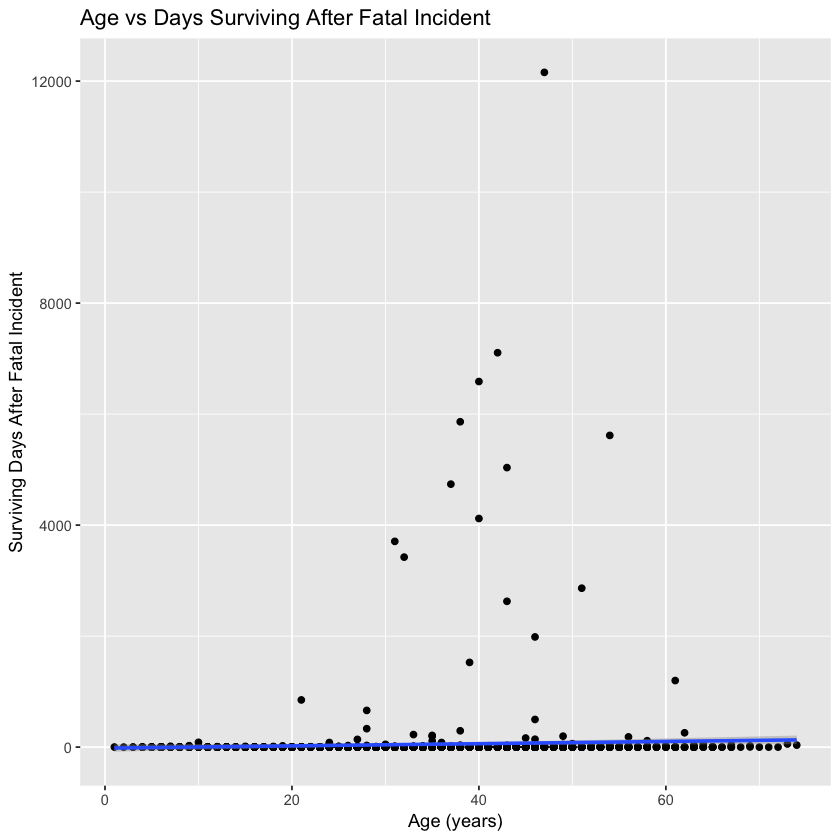

In [22]:
fire_main %>% select(Age, Days.After.Incident) %>% na.omit() %>% ggplot(aes(x=Age, y=Days.After.Incident)) + geom_point() + geom_smooth(method = lm) + ggtitle("Age vs Days Surviving After Fatal Incident") + xlab("Age (years)") + ylab("Surviving Days After Fatal Incident")
head(fire_main %>% group_by(Days.After.Incident) %>% summarize(total = n()))
fire_main %>% filter(Days.After.Incident == -1) %>% select(1:5)

We found no correlation between a firefighter's age and how long they survive after an incident on the job. The only conclusion we could make is that outliers in the data tend to be above the age of 50. The data shows that 75% of the deaths occur the same day and quickly decreases to 9% of the deaths occuring 1 day later.

In [23]:
x <- fire_main$Age
y <- as.numeric(fire_main$Days.After.Incident)
model <- lm(y~x)
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
 -125.8   -65.9   -47.9   -27.9 12081.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -18.0265    34.8455  -0.517   0.6050  
x             1.9979     0.9448   2.115   0.0346 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 525 on 1515 degrees of freedom
  (20 observations deleted due to missingness)
Multiple R-squared:  0.002943,	Adjusted R-squared:  0.002285 
F-statistic: 4.472 on 1 and 1515 DF,  p-value: 0.03462


Next, we asked if there is a relationship between the age of firefighters and the date of fatal incidents. Are fire departments improving risk for younger or newer firefighters? In our analysis, we found outliers that died after 2000 but their incidents occured before 2000. To keep our dataset in the range of 2000-2015 for all our data points, we excluded these rows. We added a linear regression model to look for a trend.

Warning message:
“Removed 20 rows containing missing values (geom_point).”

ERROR: Error in .f(.x[[i]], ...): object 'gender' not found


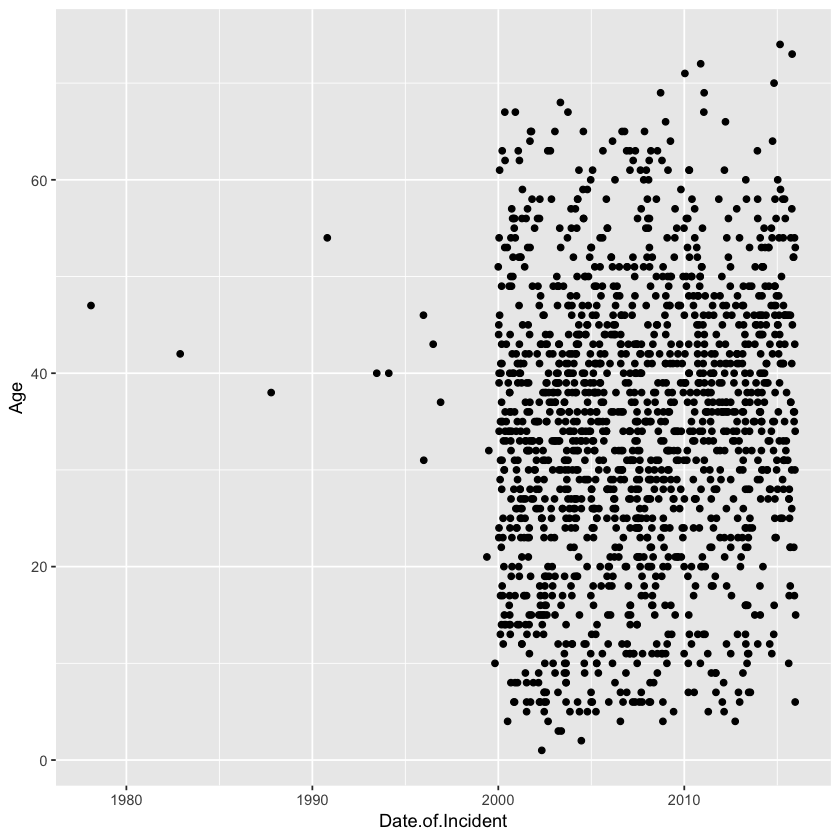

In [25]:
ggplot(fire_main, aes(x=Date.of.Incident, y=Age)) + geom_point()
fire_main %>% drop_na(gender) %>% filter(Date.of.Incident >= as.Date("2000-01-01")) %>% ggplot(aes(x=Date.of.Incident, y=Age, color=gender)) + geom_point() + geom_smooth(method=lm) + labs(title = "Age at Fatal Incident over Time", subtitle = "Non-wildland Firefighters") + xlab("Date (years)") + ylab("Age (years)")
fire_wild %>% drop_na(gender) %>% filter(Date.of.Incident >= as.Date("2000-01-01")) %>% ggplot(aes(x=Date.of.Incident, y=Age, color=gender)) + geom_point() + geom_smooth(method=lm) + labs(title = "Age at Fatal Incident over Time", subtitle = "Wildland Firefighters") + xlab("Date (years)") + ylab("Age (years)")

Both the Wildland and non-Wildland firefighters have weak trends over time. Females and males have same trends, with females dying at an earlier age. With non-Wildland firefighters, there is a weak upward trend line suggesting that the fighters may experience fatal incidents at a higher age. This could mean the firefighters are more experienced and have received more training allowing them to live longer. The Wildland firefighters have a weak downward trend which is most likely biased by several young firefighters dying during the Yarnell Hill Fire on June 30th, 2013.

Next, we wanted to take a deeper look into these trends by analyzing the number of deaths per year for Wildland and non-Wildland firefighters.

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

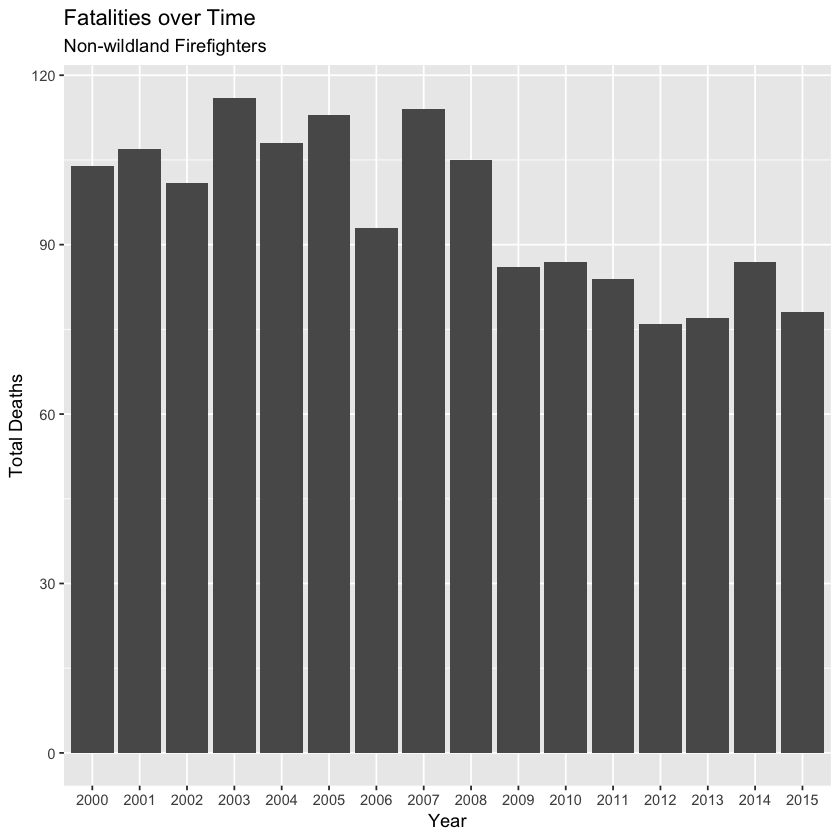

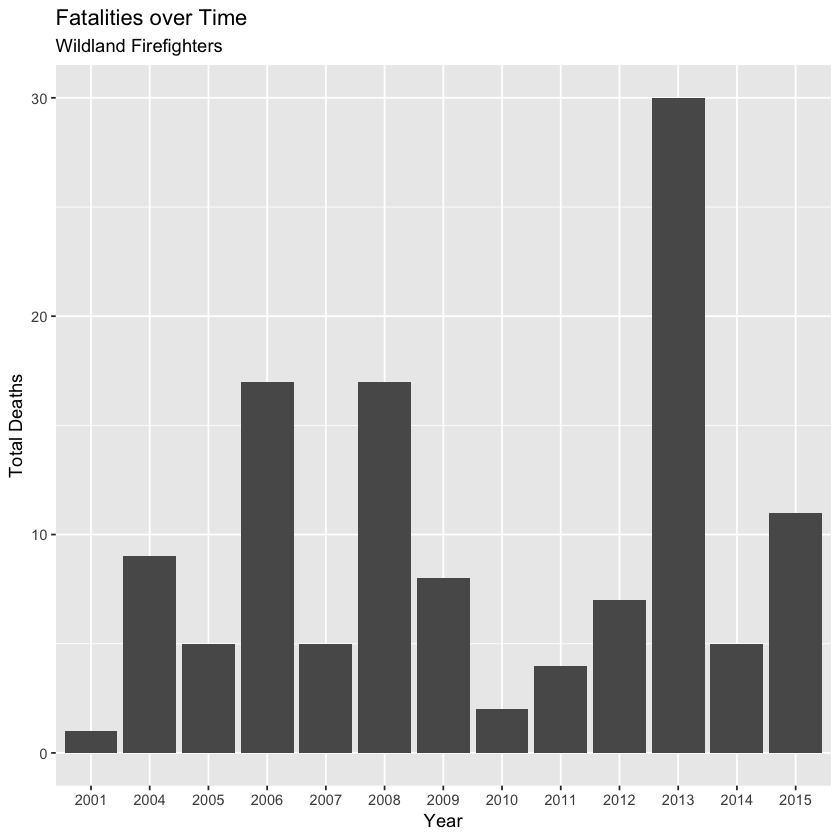

In [26]:
fire_main %>% drop_na(Date.of.Incident) %>% ggplot() + geom_histogram(aes(x=format(Date.of.Death, "%Y")), stat = "count") + labs(title = "Fatalities over Time", subtitle = "Non-wildland Firefighters") + xlab("Year") + ylab("Total Deaths")
fire_wild %>% drop_na(Date.of.Incident) %>% ggplot() + geom_histogram(aes(x=format(Date.of.Death, "%Y")), stat = "count") + labs(title = "Fatalities over Time", subtitle = "Wildland Firefighters") + xlab("Year") + ylab("Total Deaths")

We conclude that non-Wildland firefighters have seen a slight decrease in total deaths when comparing the 2000-2008 and 2009-2015. Wildland firefighters show no trends over the years. The data does highlight that the Yarnel Hill Fire was a significant event for Wildland firefighters.